In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ttest_ind
%matplotlib inline
import seaborn as sns

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [3]:
init_notebook_mode(connected=True)

In [4]:
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [5]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [6]:
# selecting the columns I want to work with, and assigning them to a new df movies.

movies = df[['title','genres','original_language','release_date','budget','revenue', 'runtime','popularity','vote_average','vote_count']]

In [7]:
#  The genres column has a lot of extra info. I just want the category the movie falls into so I cut the extra info out. Saving
#  saving the new info as genre and then removing the old column. 

gen = movies['genres'].apply(lambda genres: genres.split('"')[5:6])

In [8]:
movies['genre'] = gen

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [9]:
movies.drop(['genres'],axis=1, inplace=True)

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [10]:
movies['genre'] = movies['genre'].apply(lambda g: str(g))

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Convert String to Datetime 

In [11]:
movies['DateTime'] = pd.to_datetime(movies['release_date'])
movies['DateTime'].head()

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: DateTime, dtype: datetime64[ns]

In [12]:
movies['Year'] = movies["DateTime"].apply(lambda x: x.year)
movies['Month'] = movies["DateTime"].apply(lambda x: x.month)
movies['WeekDay'] = movies["DateTime"].apply(lambda x: x.dayofweek)
movies.head()

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,title,original_language,release_date,budget,revenue,runtime,popularity,vote_average,vote_count,genre,DateTime,Year,Month,WeekDay
0,Avatar,en,2009-12-10,237000000,2787965087,162.0,150.437577,7.2,11800,['Action'],2009-12-10,2009.0,12.0,3.0
1,Pirates of the Caribbean: At World's End,en,2007-05-19,300000000,961000000,169.0,139.082615,6.9,4500,['Adventure'],2007-05-19,2007.0,5.0,5.0
2,Spectre,en,2015-10-26,245000000,880674609,148.0,107.376788,6.3,4466,['Action'],2015-10-26,2015.0,10.0,0.0
3,The Dark Knight Rises,en,2012-07-16,250000000,1084939099,165.0,112.312950,7.6,9106,['Action'],2012-07-16,2012.0,7.0,0.0
4,John Carter,en,2012-03-07,260000000,284139100,132.0,43.926995,6.1,2124,['Action'],2012-03-07,2012.0,3.0,2.0


In [13]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [14]:
movies['WeekDay'] = movies['WeekDay'].map(dmap)

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## About this data set
This data set was scraped from the webpage Imdb.  It is the break down of just under 5000 movies. I have removed a handful of columns to focus on specific data. I have also change the genres column to genre while removing the ids and just taking the categories name. Also, I have set up a datetime column to make a Weekday, Month, and Year columns.

## Hypotheses

1) What columns have the most influence on revenue?

2) How is a movie's revenue and average score affected by its genre?

3) What influence does release date have on revenue?

In [16]:
# First, lets check for our columns object type and make sure we don't have too many null values.  
# We can also use a heatmap to visualize this.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 14 columns):
title                4803 non-null object
original_language    4803 non-null object
release_date         4802 non-null object
budget               4803 non-null int64
revenue              4803 non-null int64
runtime              4801 non-null float64
popularity           4803 non-null float64
vote_average         4803 non-null float64
vote_count           4803 non-null int64
genre                4803 non-null object
DateTime             4802 non-null datetime64[ns]
Year                 4802 non-null float64
Month                4802 non-null float64
WeekDay              4802 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 525.4+ KB


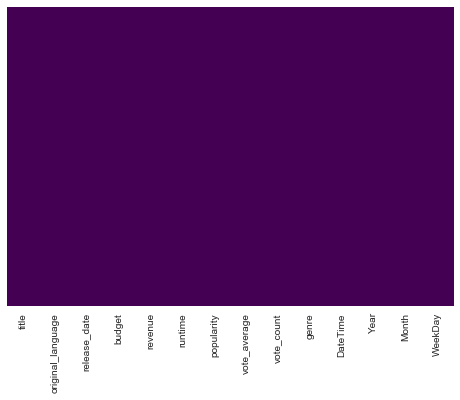

In [17]:
# Looks like we are good.  The solid purple shows no null values, any null value would appear as a gold bar.
sns.heatmap(movies.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [18]:
# Next, I like to run describe to see my numerical column's std, max, and min.  Doing this helps determine the range
# of the column and how clustered the data will be.

movies.describe()

,budget,revenue,runtime,popularity,vote_average,vote_count,Year,Month
count,4.803000e+03,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000,4802.000000,4802.000000
mean,2.904504e+07,8.226064e+07,106.875859,21.492301,6.092172,690.217989,2002.468763,6.795918
std,4.072239e+07,1.628571e+08,22.611935,31.816650,1.194612,1234.585891,12.414354,3.424187
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1916.000000,1.000000
25%,7.900000e+05,0.000000e+00,94.000000,4.668070,5.600000,54.000000,1999.000000,4.000000
50%,1.500000e+07,1.917000e+07,103.000000,12.921594,6.200000,235.000000,2005.000000,7.000000
75%,4.000000e+07,9.291719e+07,118.000000,28.313505,6.800000,737.000000,2011.000000,10.000000
max,3.800000e+08,2.787965e+09,338.000000,875.581305,10.000000,13752.000000,2017.000000,12.000000


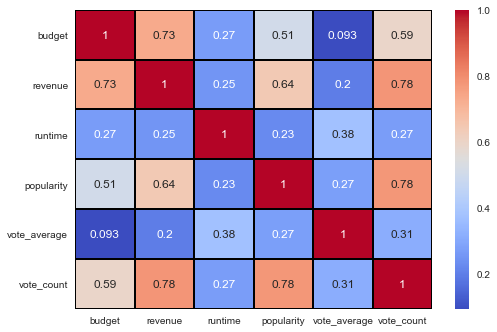

In [11]:
# Now, using a heat map we can see which columns have a strongest corrilation to eachother. This is a perfect way to see,
# what columns strongly affect Revenue

sns.heatmap(movies.corr(), cmap='coolwarm', linecolor='black', linewidths=1, annot=True)
plt.show()

## 1) What numerical columns have the most influence on revenue?

First, I'll use scatter plots to quickly visual the 3 strongest corrilation we saw on the heatmap. 

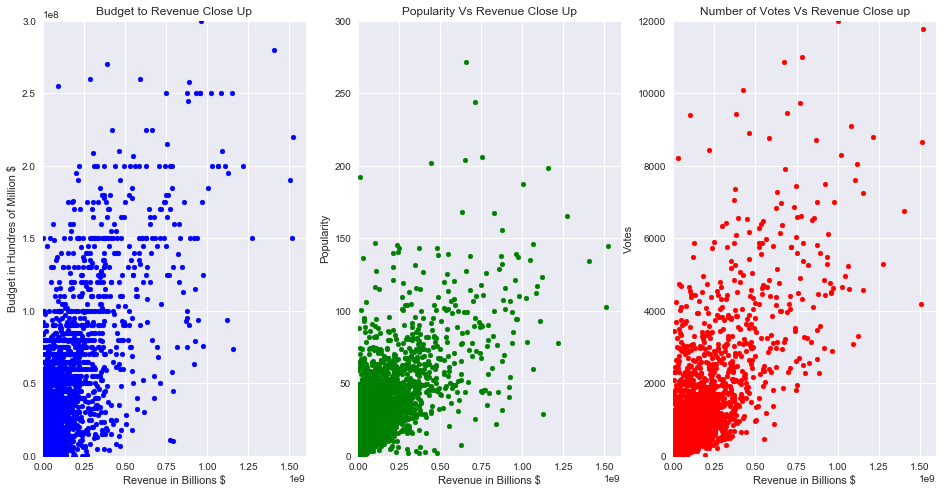

In [23]:
plt.figure(figsize=(16, 8))

plt.subplot(1,3,1)
plt.scatter(x='revenue', y='budget',s= 24, c='blue',data=movies)
plt.xlabel('Revenue in Billions $')
plt.ylabel('Budget in Hundres of Million $')
plt.xlim(-10000,1600000000)
plt.ylim(0,300000000)
plt.title('Budget to Revenue Close Up')

plt.subplot(1,3,2)
plt.scatter(x='revenue', y='popularity',s= 24, c='green',data=movies)
plt.xlim(-10000,1600000000)
plt.ylim(0,300)
plt.xlabel('Revenue in Billions $')
plt.ylabel('Popularity')
plt.title('Popularity Vs Revenue Close Up')

plt.subplot(1,3,3)
plt.scatter(x='revenue', y='vote_count',s= 24, c='red',data=movies)
plt.xlabel('Revenue in Billions $')
plt.ylabel('Votes')
plt.title('Number of Votes Vs Revenue Close up')
plt.xlim(-10000,1600000000)
plt.ylim(0,12000)


plt.tight_layout
plt.show()

These scatter plots show a positive corrilation, as x increases so does y. So, as budget, popularity, and number of votes increase, so does a movies revenue.  To take another look at this, we can use a regression line.

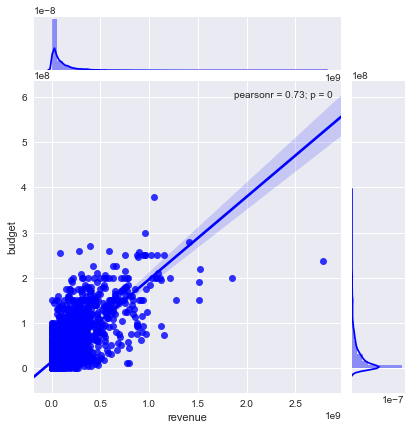

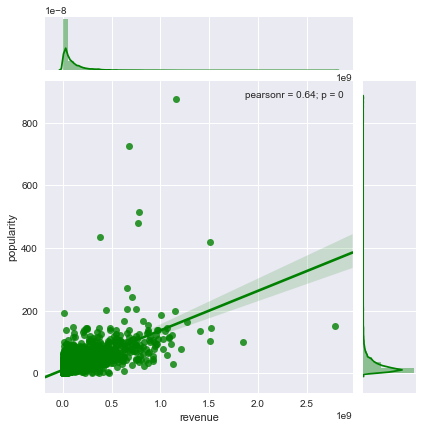

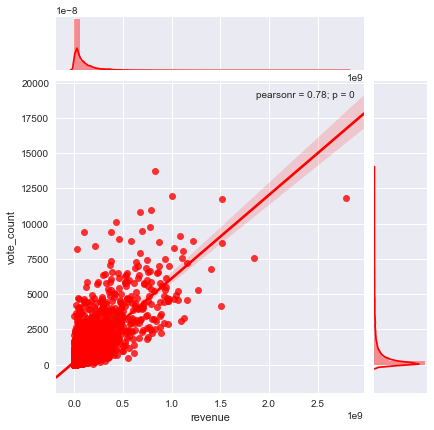

In [22]:
sns.jointplot(x='revenue', y='budget',data=movies,kind='reg',color='blue')
sns.jointplot(x='revenue', y='popularity',data=movies,kind='reg',color='green')
sns.jointplot(x='revenue', y='vote_count',data=movies,kind='reg',color='red') 

Alright, now that we have looked at the 3 'hottest' tiles. Lets take a look at the 2 much 'colder' tiles.  To do this, I am going to start by plotting another set of scatter plots. Then, plot the regression line to highlight the trend. 

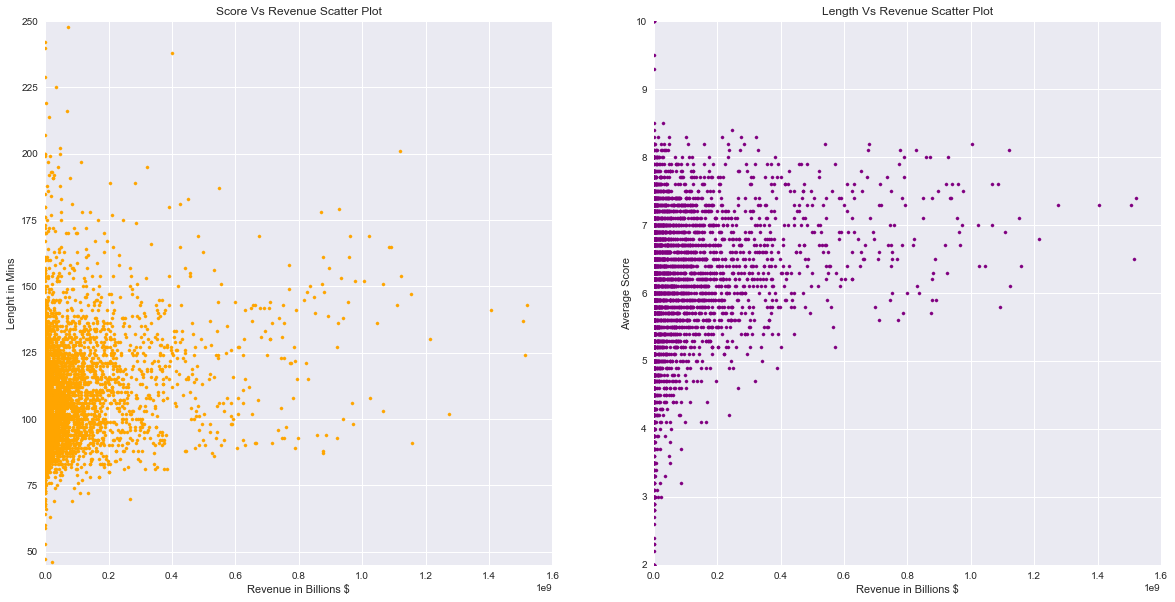

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(x='revenue', y='runtime',c='orange',s=10,data=movies)
plt.xlabel('Revenue in Billions $')
plt.ylabel('Lenght in Mins')
plt.title('Score Vs Revenue Scatter Plot')
plt.xlim(-10000,1600000000)
plt.ylim(45,250)

plt.subplot(1,2,2)
plt.scatter(x='revenue', y='vote_average',c='purple',s=10,data=movies)
plt.xlabel('Revenue in Billions $')
plt.ylabel('Average Score')
plt.title('Length Vs Revenue Scatter Plot')
plt.xlim(-10000,1600000000)
plt.ylim(2,10)

plt.tight_layout
plt.show()

Just from these scatters, we can already tell that these variable have a much weaker linear corrilation.  This should be clear from our next plot as the slope of their reg line should be much lower.

Ttest_indResult(statistic=-35.005931494375673, pvalue=2.5501932288284779e-239)


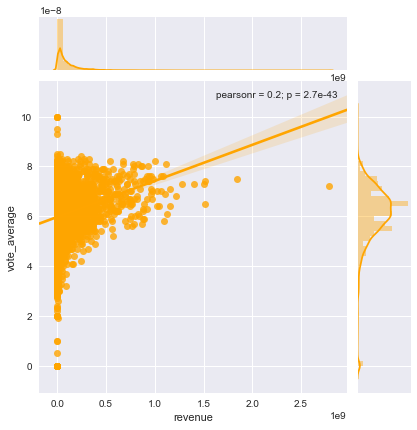

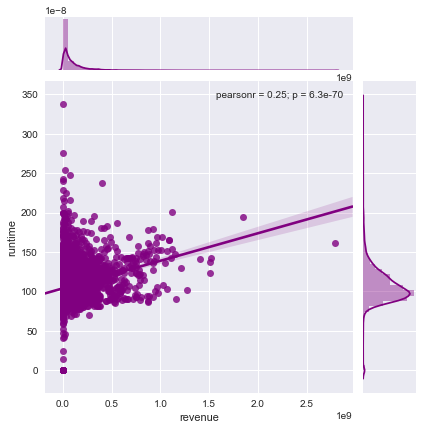

In [42]:
sns.jointplot(x='revenue', y='vote_average',data=movies,kind='reg',color='orange')
sns.jointplot(x='revenue', y='runtime',data=movies,kind='reg',color='purple')
print(ttest_ind(movies['vote_average'],movies['revenue'], equal_var=False))

### Conclusion to Question One

Conclusion, the most important factors to focus on to increasing a movies revenue, are the movies budget, popularity and its vote count. While, a movies runtime and average vote score are less important.  

## 2) How is a movie's revenue and average vote score affected by its genre?

First, I want to see how the average vote scores are distrubuted. This will help us determine what plot to use to effectively visualize the data.

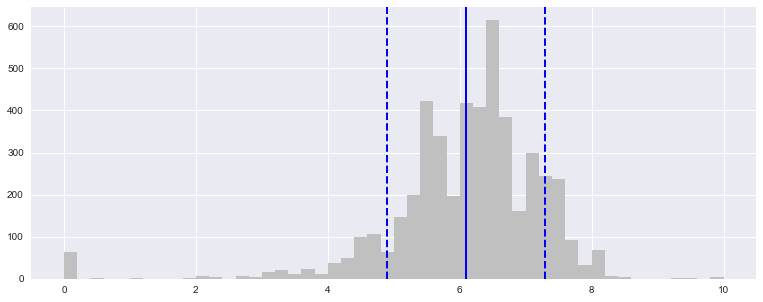

In [47]:
plt.figure(figsize=(13,5))

plt.hist(movies['vote_average'], bins=50,color='silver')
plt.axvline(movies['vote_average'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(movies['vote_average'].mean() + movies['vote_average'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(movies['vote_average'].mean() - movies['vote_average'].std(), color='b', linestyle='dashed', linewidth=2) 

plt.show()

Using the STD with the mean of the dist plot we can see that almost all of our data is distributed in a very small range.  Knowing this, I think it would be best to use a boxplot to visualize this data.  We will be able to see the  middle 25% -75% of each category while comparing it to the info charted above.

In [105]:
avgVote = movies['vote_average'].mean()

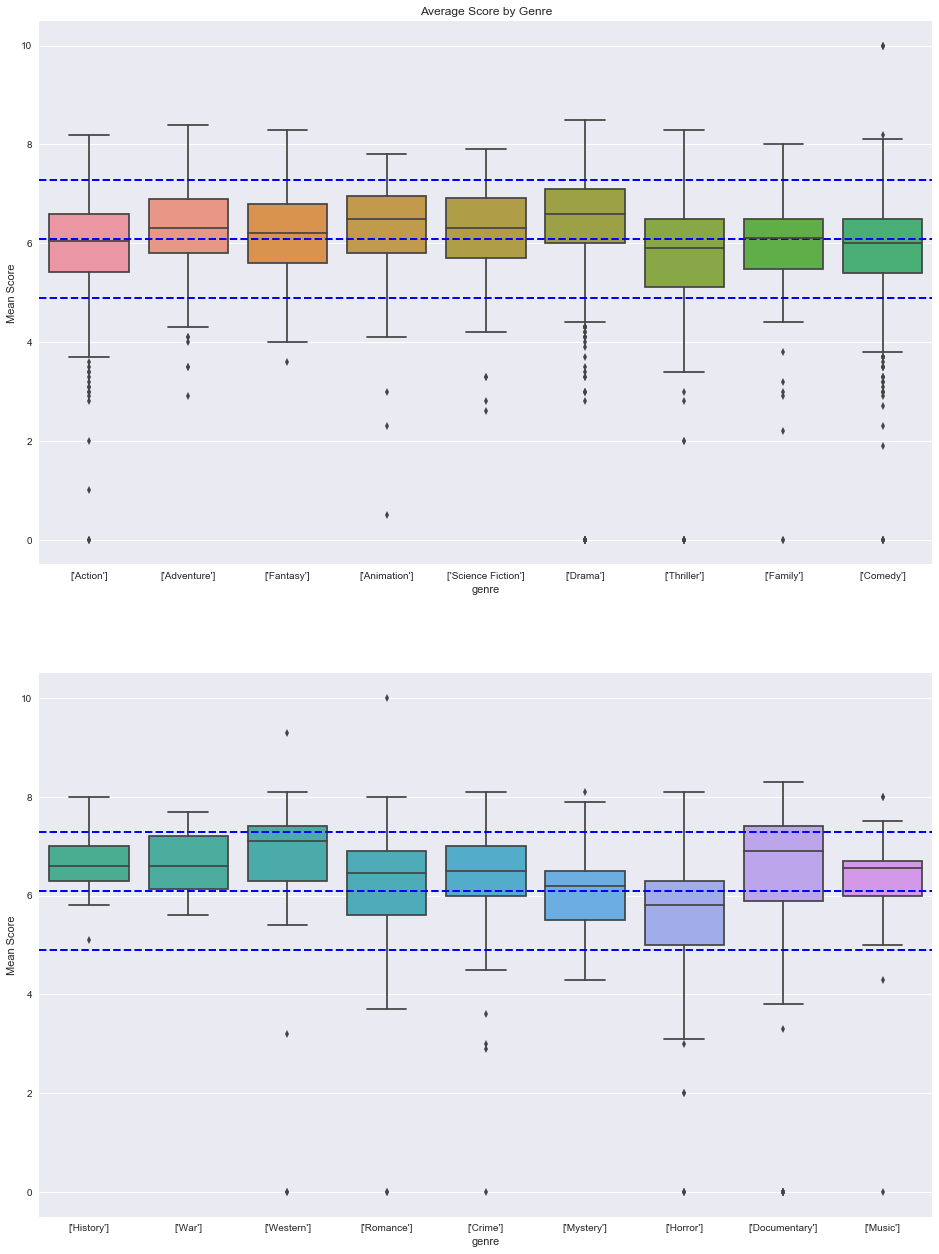

In [108]:
plt.figure(figsize=(16, 22))
plt.subplot(2,1,1)
sns.boxplot(x='genre',y='vote_average',data=movies)
plt.xlim(-0.5 ,8.5)
plt.title('Average Score by Genre')
plt.ylabel('Mean Score')
plt.axhline(avgVote, color='b', linestyle='dashed', linewidth=2)
plt.axhline(movies['vote_average'].mean() + movies['vote_average'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axhline(movies['vote_average'].mean() - movies['vote_average'].std(), color='b', linestyle='dashed', linewidth=2) 
# split data again for a better visual

plt.subplot(2,1,2)
sns.boxplot(x='genre',y='vote_average',data=movies)
plt.xlim(8.5 ,17.5)
plt.ylabel('Mean Score')
plt.axhline(avgVote, color='b', linestyle='dashed', linewidth=2)
plt.axhline(movies['vote_average'].mean() + movies['vote_average'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axhline(movies['vote_average'].mean() - movies['vote_average'].std(), color='b', linestyle='dashed', linewidth=2) 

plt.show()

### Conclusion to question 2.A

   Looking at this boxplot we can see that none of the genres stray to far from the overall mean score.  Also, we can see that the middle 25%-75% of each genres data, fits inside a single STD of the average vote score. Leading me to the conclusion, while there are some genres that tend to do slightly better then others.  No genre will drastically increase a movies average score alone.

### Now that we have seen genres affect on average vote score.  Lets move on and see how it applies to revenue.

In [15]:
movies.mean().head(3)

budget     2.904504e+07
revenue    8.226064e+07
runtime    1.068759e+02
dtype: float64

In [16]:
avgRev = movies.mean()[1]  #grabbing the over revenue mean

In [54]:
df = movies.groupby(['genre']).mean()['revenue'].reset_index()
df.head(3)

,genre,revenue
0,['Action'],1.218614e+08
1,['Adventure'],2.109611e+08
2,['Animation'],2.417656e+08


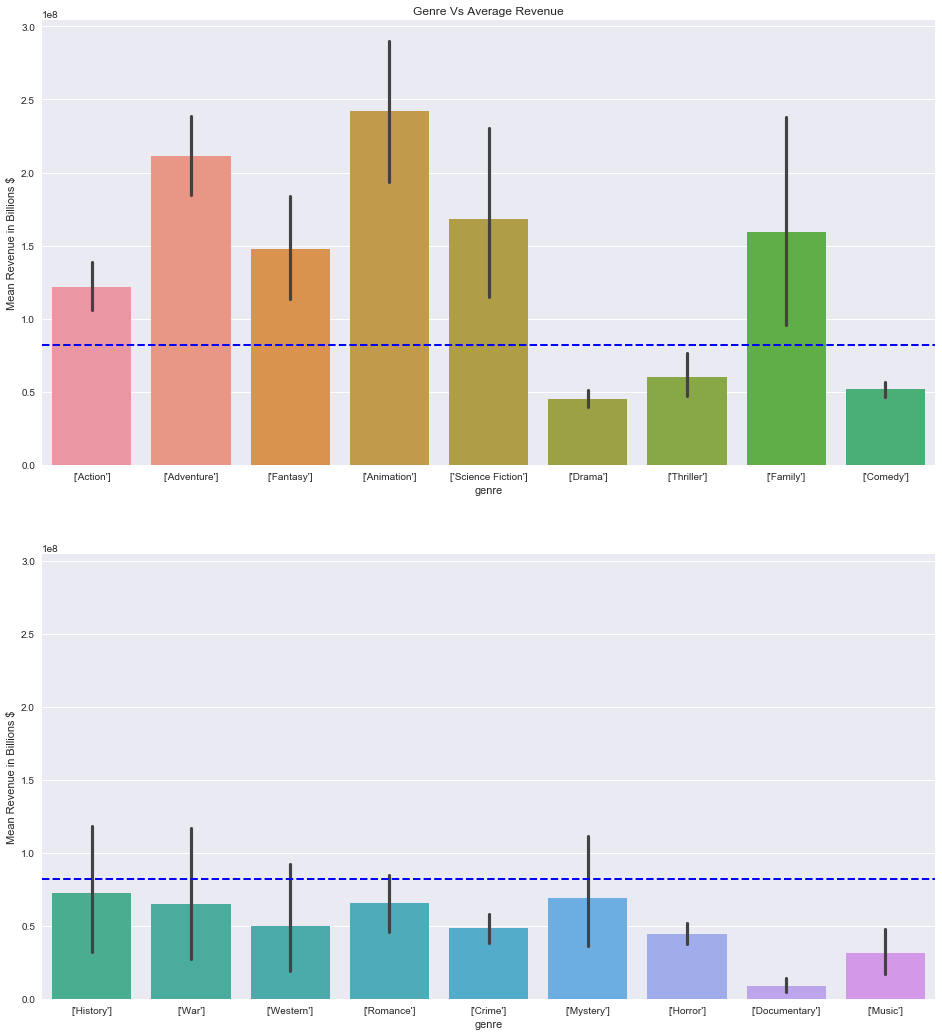

In [103]:
plt.figure(figsize=(16, 18))

plt.subplot(2,1,1)
sns.barplot(x='genre',y='revenue',data=movies)
plt.xlim(-0.5 ,8.5)
plt.ylabel('Mean Revenue in Billions $')
plt.title('Genre Vs Average Revenue')
plt.axhline(avgRev, color='b', linestyle='dashed', linewidth=2)

# I have split the graph in half to create a more readable visual

plt.subplot(2,1,2)
sns.barplot(x='genre',y='revenue',data=movies)
plt.ylabel('Mean Revenue in Billions $')
plt.xlim(8.5 ,17.5)
plt.axhline(avgRev, color='b', linestyle='dashed', linewidth=2)

plt.show()

In [58]:
adve = df2.iloc[1]
anime = df2.iloc[2]
sci = df2.iloc[15]
doc = df2.iloc[5]
hor = df2.iloc[11]
mus = df2.iloc[12]

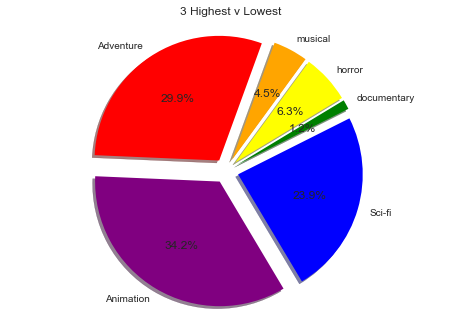

In [64]:
plt.title("3 Highest v Lowest")
labels = 'Adventure', 'Animation','Sci-fi','documentary','horror','musical'
sizes = [adve,anime,sci,doc,hor,mus]
colors = ['red','purple','blue','green','yellow','orange']
explode = [0.1,0.1,0.1,0.1,0.1,0.1]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=70)

plt.axis('equal')
plt.show()

### Conclusion to question 2.B

Now this is much better.  Genre has a very strong affect on revenue and we are able to see what genres generate the most revenue. Also, which ones make the least.  To increase our revenue we should make movies involving adventure, animation, or science ficition. While avoiding genres like, documentery, horrors, or musicals.

### Conclusion to question 2 recap

   A) The genre have very little influence on the average vote score.  We should focus on other factors when trying to improve our average vote score.
   
   B) Genre has a big affect on revenue.  Genre should be considered carefully if we want to increase our revenue.

## 3) What affect does release date have on revenue?

First, lets start by seeing how these movies are distributed. Then, we will see what day, and month have the most movies released in it. Then lets see how those groupings affect a movies revenue.

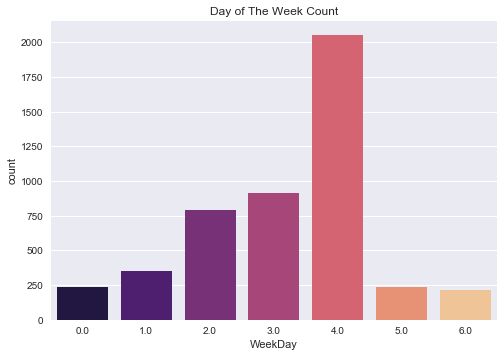

In [15]:
sns.countplot(x='WeekDay', data=movies,palette='magma')
plt.title('Day of The Week Count')

The majority of these movies are released on Friday, Wednesday, and Thursday.  Now lets see the mean revenue by day and see if there is any relation. 

In [45]:
Mon = movies[movies['WeekDay'] == "Mon"].mean()[1]
Tue = movies[movies['WeekDay'] == "Tue"].mean()[1]
Wed = movies[movies['WeekDay'] == 'Wed'].mean()[1]
Thu = movies[movies['WeekDay'] == "Thu"].mean()[1]
Fri = movies[movies['WeekDay'] == "Fri"].mean()[1]
Sat = movies[movies['WeekDay'] == "Sat"].mean()[1]
Sun = movies[movies['WeekDay'] == "Sun"].mean()[1]

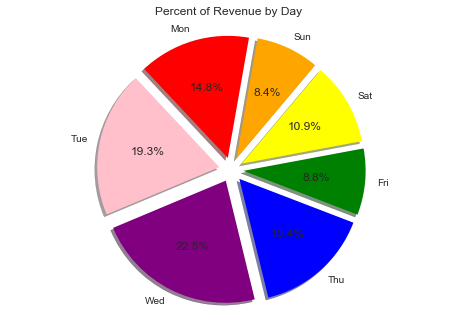

In [51]:
plt.title("Percent of Revenue by Day ")
labels = 'Mon', 'Tue','Wed','Thu','Fri','Sat','Sun'
sizes = [Mon,Tue,Wed,Thu,Fri,Sat,Sun]
colors = ['red','pink','purple','blue','green','yellow','orange']
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=80)

plt.axis('equal')
plt.show()

Wow, not what I had expected.  It seems that the busier days have an even distribution of revenue.  Friday, with the highest release day has one of the lowest revenue averages. While, Thursday the second busiest is slightly above average and last, Wednesday the third busiest has the highest average revenue of all.

Now lets move on to the month category

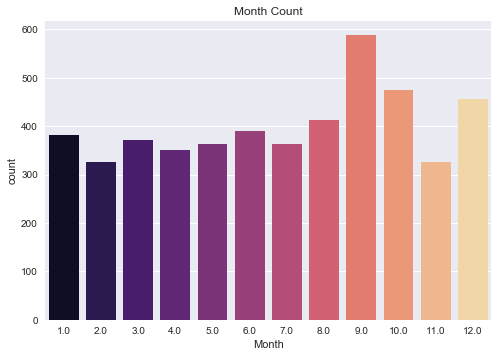

In [33]:
sns.countplot(x='Month', data=movies,palette='magma')
plt.title('Month Count')

With the majority of the movies being released in the forth quarter. Lets see how that affects revenue.

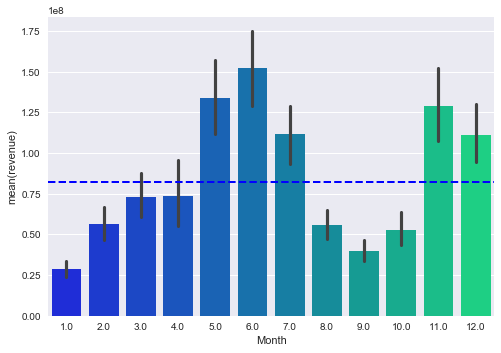

In [138]:
sns.barplot(x='Month',y='revenue',data=movies,palette='winter')
plt.axhline(avgRev, color='b', linestyle='dashed', linewidth=2)

Once again a split result.  The first half of quarter four has very low revenue averages while the back half seems to skyrocket. 
While it seems like the day and month have a pretty strong affect on revenue. It doesn't seem like a higher number of releases corrilates to higher revenue. 

Just for fun, lets check bother together

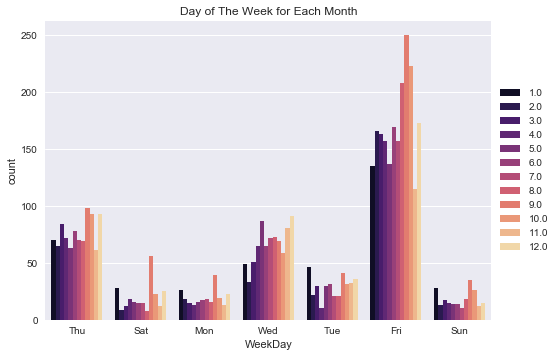

In [36]:
sns.countplot(x='WeekDay', data=movies, hue='Month',palette='magma')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Day of The Week for Each Month')

Fridays in September have the most releases

Another usefull way we can visualize this distribution is with a heat map.

In [120]:
DayMonth = movies.groupby(by=['WeekDay','Month']).count()['genre'].unstack()
DayMonth.head()

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
WeekDay,,,,,,,,,,,,
Fri,135,166,163,157,137,169,157,208,250,223,115,173
Mon,26,18,15,13,16,17,18,16,39,19,13,23
Sat,28,9,12,18,16,15,15,8,56,23,12,25
Sun,28,13,17,15,14,14,10,18,35,26,12,15
Thu,70,65,84,72,63,78,70,69,98,93,61,93


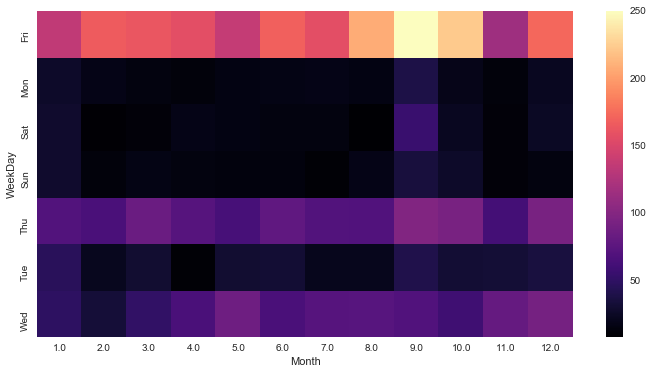

In [122]:
plt.figure(figsize=(12,6))
sns.heatmap(DayMonth,cmap='magma')

In [44]:
FS = movies[[movies['WeekDay'] == "Fri"] and movies['Month'] == 9].mean() #grabbing any movie released on a Friday in Sept. 

In [47]:
FS['revenue'] - movies.mean()['revenue']

-42268675.597254261

On average, A movie release on a Friday in September makes $ -42,268,675.60 less than our average movie.  

## Conclusion to question 3

In conclusion, the day of the week a movie is release does have an affect on a movies revenue.  However, I am not positive this is from the day alone or a combination of factors.  According to this data set, Wednesday and Thursday have the highest average revenue.  While, Friday and Saturday have the worst averages.  Similarly, months tended to have very different averages.  Usually, far above or below the mean. I think a larger sample size would be needed to be sure. When I ran the t-test it return an error.

## Closing

After analyzing this data, I believe the best way to increase a movies revenue is to focus on the movies popularity, budget, and vote count.  Also, movies involving adventure, animation, and or science fiction tend to have the highest revenue.  Last, release the movie on Tuesday, Wednesday, or Thursday.